In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
import torch
import torch.nn as nn

In [218]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [219]:
companies = ['MSFT.csv', 'FB.csv', 'DKNG.csv'] 
df = pd.read_csv(companies[2])

In [220]:
data = df['Close'].values

In [221]:
T = 15
X = []
Y = []

for t in range(len(data)- 2 * T):
    x = data[t:t+T]
    X.append(x)
    y = data[t+T: t+T*2]
    Y.append(y)

In [222]:
class ANN(nn.Module):
    def __init__(self, input_no, output_no, hidden_layers):
        super().__init__()
        layers = []
        
        no_in = input_no
        for h in hidden_layers:
            layers.append(nn.Linear(no_in, h))
            layers.append(nn.ReLU(inplace=True))
            layers.append(nn.Dropout(.3))
            no_in = h
            
        layers.append(nn.Linear(hidden_layers[-1], output_no))
        self.layer = nn.Sequential(*layers)
    def forward(self,X):
        out = self.layer(X)
        return out

In [223]:
model = ANN(T, T, [100,100,100,100,15])

In [224]:
model

ANN(
  (layer): Sequential(
    (0): Linear(in_features=15, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU(inplace=True)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=100, out_features=100, bias=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=100, out_features=15, bias=True)
    (13): ReLU(inplace=True)
    (14): Dropout(p=0.3, inplace=False)
    (15): Linear(in_features=15, out_features=15, bias=True)
  )
)

In [225]:
train_count = int(len(X) * 0.01)
X_train = torch.tensor(X[:-1], dtype=torch.float)
y_train =torch.tensor(Y[:-1], dtype=torch.float)
X_test = torch.tensor(X[-1:], dtype=torch.float)
y_test = torch.tensor(Y[-1:], dtype=torch.float)

In [226]:
train_loader = DataLoader((X_train,y_train), shuffle=True, batch_size=X_train.shape[0])
for X_train, y_train in train_loader:
    break

In [227]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

In [228]:
epochs = 80
losses = []
test_losses = []
for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    test_loss = criterion(model(X_test),y_test)
    test_losses.append(test_loss)
    print(f'Epoch [{epoch+1}/{epochs}]. Loss : {loss.item()}. Test Loss : {test_loss.item()}')

Epoch [1/80]. Loss : 442.64923095703125. Test Loss : 1834.9776611328125
Epoch [2/80]. Loss : 438.2863464355469. Test Loss : 1835.800537109375
Epoch [3/80]. Loss : 432.591064453125. Test Loss : 1812.964599609375
Epoch [4/80]. Loss : 424.2961730957031. Test Loss : 1695.9239501953125
Epoch [5/80]. Loss : 414.56451416015625. Test Loss : 1796.726318359375
Epoch [6/80]. Loss : 400.35162353515625. Test Loss : 1580.1195068359375
Epoch [7/80]. Loss : 372.1764831542969. Test Loss : 1579.2652587890625
Epoch [8/80]. Loss : 357.2143859863281. Test Loss : 1350.336181640625
Epoch [9/80]. Loss : 333.66888427734375. Test Loss : 1405.26171875
Epoch [10/80]. Loss : 332.72369384765625. Test Loss : 1337.6422119140625
Epoch [11/80]. Loss : 323.3633117675781. Test Loss : 1067.220703125
Epoch [12/80]. Loss : 291.3654479980469. Test Loss : 1087.611572265625
Epoch [13/80]. Loss : 274.39996337890625. Test Loss : 1224.786865234375
Epoch [14/80]. Loss : 266.9905090332031. Test Loss : 1238.812744140625
Epoch [15/80

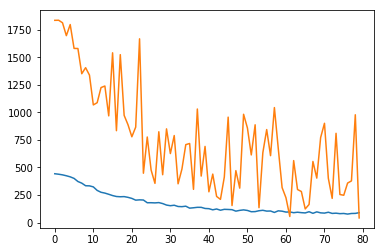

In [229]:
plt.plot(range(epochs), losses)
plt.plot(range(epochs), test_losses)

In [230]:
y_pred = model(X_test)
loss = criterion(y_pred, y_test)
print(loss)

tensor(539.4167, grad_fn=<MseLossBackward>)


In [231]:
X_test[-1].reshape(1,-1)

tensor([[34.0900, 31.6100, 32.0400, 33.7400, 36.0500, 33.9100, 34.6800, 37.2100,
         36.2700, 36.3200, 35.1500, 35.8100, 39.0600, 38.8600, 39.0600]])

In [232]:
pred = model(X_test[-1].reshape(1,-1))

In [233]:
pred = pred.reshape(-1).detach()

In [234]:
pred

tensor([21.8381, 31.5296, 26.7423, 26.1746, 30.2470, 19.1099, 28.5938, 38.7899,
        35.7905, 31.6104, 37.9412, 38.4864, 33.6589, 30.0012, 29.0171])

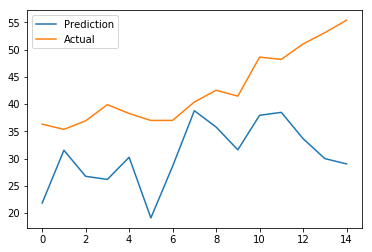

In [235]:
plt.plot(pred, label="Prediction")
plt.plot(y_test[-1], label="Actual")
plt.legend()

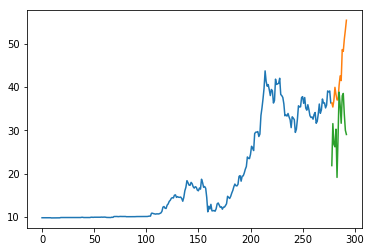

In [236]:
plt.plot(data[:-T])
plt.plot(np.arange(T)+len(data[:-T]),Y[-1], label="Actual")
plt.plot(np.arange(T)+len(data[:-T]),pred, label="Prediction")
#plt.legend()

In [237]:
X[-1]

array([34.09    , 31.610001, 32.040001, 33.740002, 36.049999, 33.91    ,
       34.68    , 37.209999, 36.27    , 36.32    , 35.150002, 35.810001,
       39.060001, 38.860001, 39.060001])

In [238]:
# What if instead of picking the next values, predict next +/- values from the very last value